## **Problem 5**

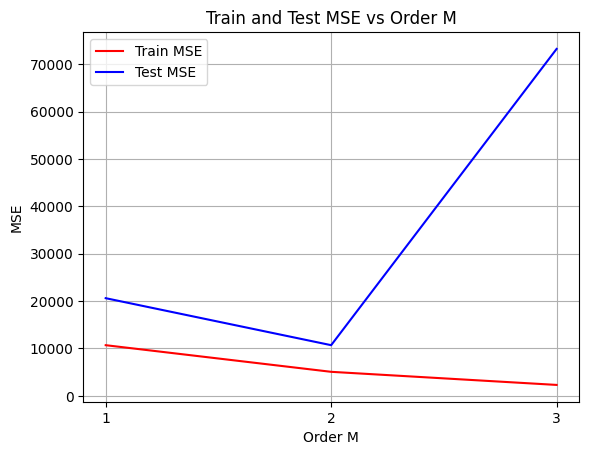

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Dataset B
train_data = pd.read_csv("FISHDTR.csv")
test_data = pd.read_csv("FISHDTE.csv")

# Extract training and testing data
X_train = train_data[['width', 'length']].values
y_train = train_data['weight'].values
X_test = test_data[['width', 'length']].values
y_test = test_data['weight'].values

def design_matrix(X, M):
    """
    Constructs the design matrix for order M.
    """
    N = X.shape[0]
    if M == 1:
        return np.column_stack((np.ones(N), X))
    elif M == 2:
        return np.column_stack((np.ones(N), X, X[:, 0]**2, X[:, 1]**2, X[:, 0]*X[:, 1]))
    elif M == 3:
        return np.column_stack((np.ones(N), X, X[:, 0]**2, X[:, 1]**2, X[:, 0]*X[:, 1],
                                X[:, 0]**3, X[:, 1]**3, (X[:, 0]**2)*X[:, 1], X[:, 0]*(X[:, 1]**2)))
    else:
        raise ValueError("Unsupported order M")

def solve_for_a(X, y):
    """
    Solve for the parameter vector a using SVD.
    """
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    a = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y
    return a

def compute_mse(X, y, a):
    """
    Compute the Mean Squared Error.
    """
    y_pred = X @ a
    mse = np.mean((y - y_pred)**2)
    return mse

train_mse_values = []
test_mse_values = []

for M in [1, 2, 3]:
    X_train_design = design_matrix(X_train, M)
    X_test_design = design_matrix(X_test, M)

    a = solve_for_a(X_train_design, y_train)

    train_mse = compute_mse(X_train_design, y_train, a)
    test_mse = compute_mse(X_test_design, y_test, a)

    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)

# Plotting
plt.plot([1, 2, 3], train_mse_values, 'r', label='Train MSE')
plt.plot([1, 2, 3], test_mse_values, 'b', label='Test MSE')
plt.xlabel('Order M')
plt.ylabel('MSE')
plt.title('Train and Test MSE vs Order M')
plt.xticks([1, 2, 3])
plt.legend()
plt.grid(True)
plt.show()
